In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

# Define a simple 1-layer CNN model
input_size = 5
input_channels = 1  # Nombres de matrices entrée
model = Sequential([
    Conv2D(filters=1, kernel_size=(3, 3), activation=None , input_shape=(input_size, input_size, input_channels))
])

model.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 3, 3, 1)        │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np

# Generate dummy data
# Using a range from 0 to 255 for grayscale representation
dummy_data = np.random.randint(0, 256, size=(10, input_size, input_size, 1), dtype=np.uint8) # 10 samples, 28x28 image, 1 channel, integers from 0 to 255, using uint8 for image data type
dummy_labels = np.random.randint(0, 2, 10) # Dummy binary labels

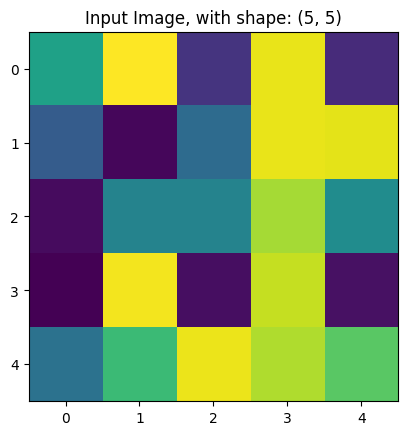

In [ ]:
#plot data
import matplotlib.pyplot as plt
plt.imshow(dummy_data[0,:,:,0])
plt.title("Input Image, with shape: " + str(dummy_data[0,:,:,0].shape))
plt.show()

In [ ]:
#

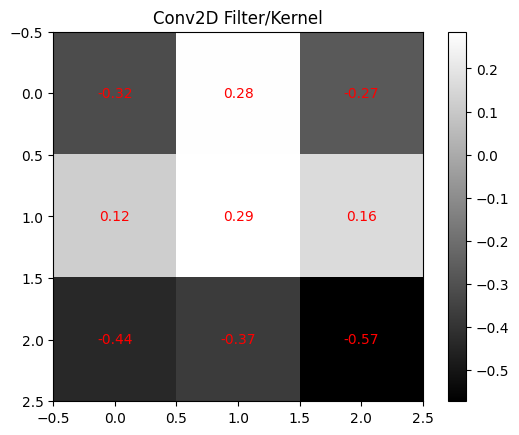

In [ ]:
# Get the weights of the Conv2D layer (the filter/kernel)
# The weights are typically stored in the first element of the layer's get_weights() list
conv_layer_weights = model.layers[0].get_weights()[0]

# Display the filter
# The shape of the weights will be (kernel_height, kernel_width, in_channels, out_channels)
# We are interested in the kernel itself, which is the first two dimensions
plt.imshow(conv_layer_weights[:, :, 0, 0], cmap='gray')
plt.title("Conv2D Filter/Kernel")
plt.colorbar()

# Add text annotations for the weights
for i in range(conv_layer_weights.shape[0]):
    for j in range(conv_layer_weights.shape[1]):
        plt.text(j, i, f'{conv_layer_weights[i, j, 0, 0]:.2f}',
                 ha="center", va="center", color="red")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


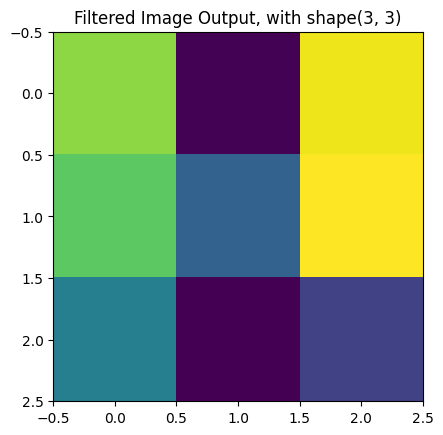

In [ ]:
# Get the output of the Conv2D layer
# We can access the first layer of the sequential model
feature_maps = model.predict(dummy_data)

# Visualize the output of the first filtered image
plt.imshow(feature_maps[0, :, :, 0])
plt.title("Filtered Image Output, with shape" + str(feature_maps[0, :, :, 0].shape))
plt.show()

In [ ]:
def output_size(input_size, kernel_size, stride, padding):
    return (input_size - kernel_size + 2 * padding) // stride + 1

In [ ]:
print(dummy_data.shape)
print("output size shall be: ", output_size(input_size, 3, 1, 0))
print(conv_layer_output.shape)

(10, 10, 10, 1)
output size shall be:  8
(10, 3, 3, 1)


#Interpretation et présentation des résultats:

Dans cet manipulation, on a pu s'introduire à la logique de keras-Tensorflow.



In [ ]:
#print the three plots next to each tohers


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

# Define a simple 1-layer CNN model
input_size = 5
input_channels = 1  # Nombres de matrices entrée
model = Sequential([
    Conv2D(filters=1, kernel_size=(3, 3), activation=None , input_shape=(input_size, input_size, input_channels)),
    MaxPooling2D(pool_size=(2, 2)) # Added MaxPooling2D layer
])

model.summary()



Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 3, 3, 1)        │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 1)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


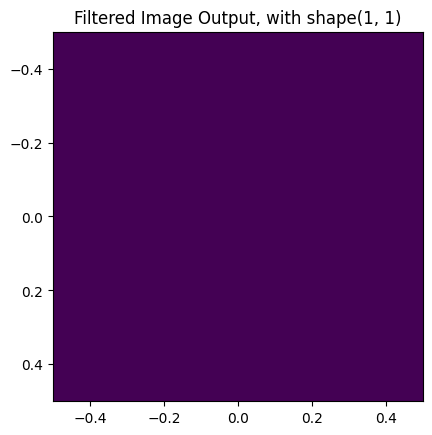

In [ ]:
model.predict(dummy_data)# Get the output of the Conv2D layer
# We can access the first layer of the sequential model
feature_maps_with_max_pooling = model.predict(dummy_data)

# Visualize the output of the first filtered image
plt.imshow(feature_maps_with_max_pooling[0, :, :, 0])
plt.title("Filtered Image Output, with shape" + str(feature_maps_with_max_pooling[0, :, :, 0].shape))
plt.show()

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

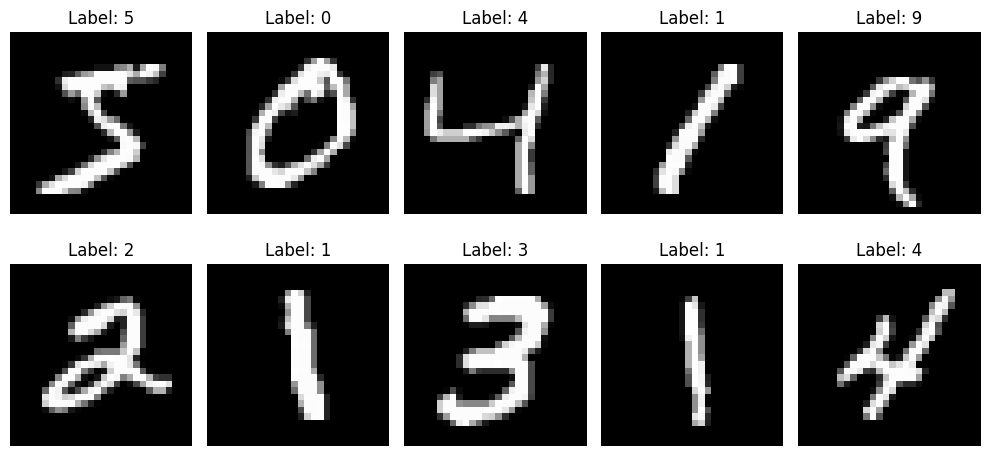

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Display the first few training images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
import numpy as np

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Add a channel dimension to the images (for Conv2D layer)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the CNN model
model_mnist = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # 10 output units for 10 digits
])

# Compile the model
model_mnist.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_mnist.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model_mnist.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

model_mnist.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8485 - loss: 0.4960 - val_accuracy: 0.9763 - val_loss: 0.0782
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9783 - loss: 0.0664 - val_accuracy: 0.9844 - val_loss: 0.0502
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9865 - loss: 0.0442 - val_accuracy: 0.9859 - val_loss: 0.0469
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9914 - loss: 0.0285 - val_accuracy: 0.9874 - val_loss: 0.0416
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9919 - loss: 0.0247 - val_accuracy: 0.9876 - val_loss: 0.0417
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9859 - loss: 0.0393
Test accuracy: 0.9901999831199646


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [ ]:
# show plots and visualise



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7034 - loss: 0.8252 - val_accuracy: 0.8553 - val_loss: 0.4090
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8642 - loss: 0.3807 - val_accuracy: 0.8686 - val_loss: 0.3577
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8842 - loss: 0.3189 - val_accuracy: 0.8834 - val_loss: 0.3216
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8989 - loss: 0.2823 - val_accuracy: 0.8949 - val_loss: 0.2930
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9084 - loss: 0.2536 - val_accuracy: 0.9027 - val_loss: 0.2696


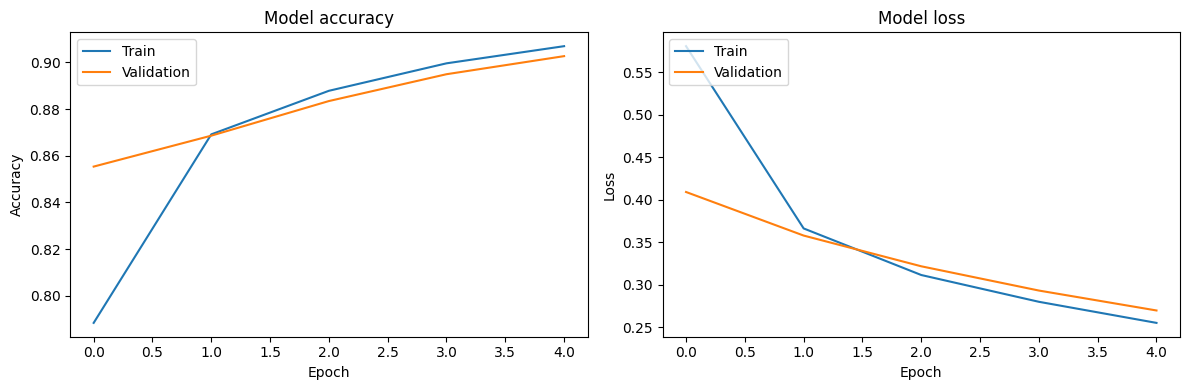

<bound method Model.summary of <Sequential name=sequential_7, built=True>>

In [ ]:
# Assuming 'history' variable is available from model.fit()
# If not, you might need to capture the history object during training
# history = model_fash_mnist.fit(...)

# If you ran the cell hysaa60fUcCy, the model_fash_mnist is trained but the history is not captured
# Let's retrain the model and capture the history for plotting

# Re-define and compile the model (using the same architecture as in hysaa60fUcCy)
model_fash_mnist_with_history = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_fash_mnist_with_history.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and capture the history
history = model_fash_mnist_with_history.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

model_fash_mnist.summary

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Import Fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Add a channel dimension to the images (for Conv2D layer)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define the CNN model (same architecture as before)
model_fash_mnist = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # 10 output units for 10 classes in Fashion MNIST
])

# Compile the model (same compilation settings)
model_fash_mnist.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model_fash_mnist.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model_fash_mnist.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7047 - loss: 0.8266 - val_accuracy: 0.8575 - val_loss: 0.3998
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8576 - loss: 0.3888 - val_accuracy: 0.8555 - val_loss: 0.3898
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8808 - loss: 0.3270 - val_accuracy: 0.8861 - val_loss: 0.3135
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8932 - loss: 0.2910 - val_accuracy: 0.8894 - val_loss: 0.2969
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9073 - loss: 0.2530 - val_accuracy: 0.8994 - val_loss: 0.2790
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8943 - loss: 0.2936
Test accuracy: 0.8932999968528748
